## Temperature Forecast Project

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\temperature.csv")
df.head(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9


In [3]:
df.tail(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [4]:
df.shape

(7752, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


**All columns are Numerical only one column is object**

In [6]:
(df.isna().sum() /len(df))* 100

station             0.025800
Date                0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64

**Frome above dataset have les than 1% null value we can drop it**

In [7]:
##droping null value
df.dropna(inplace=True)
## droping duplicate value
df.drop_duplicates(inplace=True)

In [8]:
##replacing white space
df_new = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [9]:
## converting date column in datete dtype
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.shape

(7588, 25)

In [11]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [12]:
df.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

### Exploratory data analysis

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006
LDAPS_CC1,7588.0,0.368510,0.262260,0.000000,0.146546,0.315706,0.574174,0.967277


* Avg present day max temperature is between 29-30 degree and min temperature is between 23-24 
* Avg next day max temperature is between 30-31 degree and min temperature is between 22-23

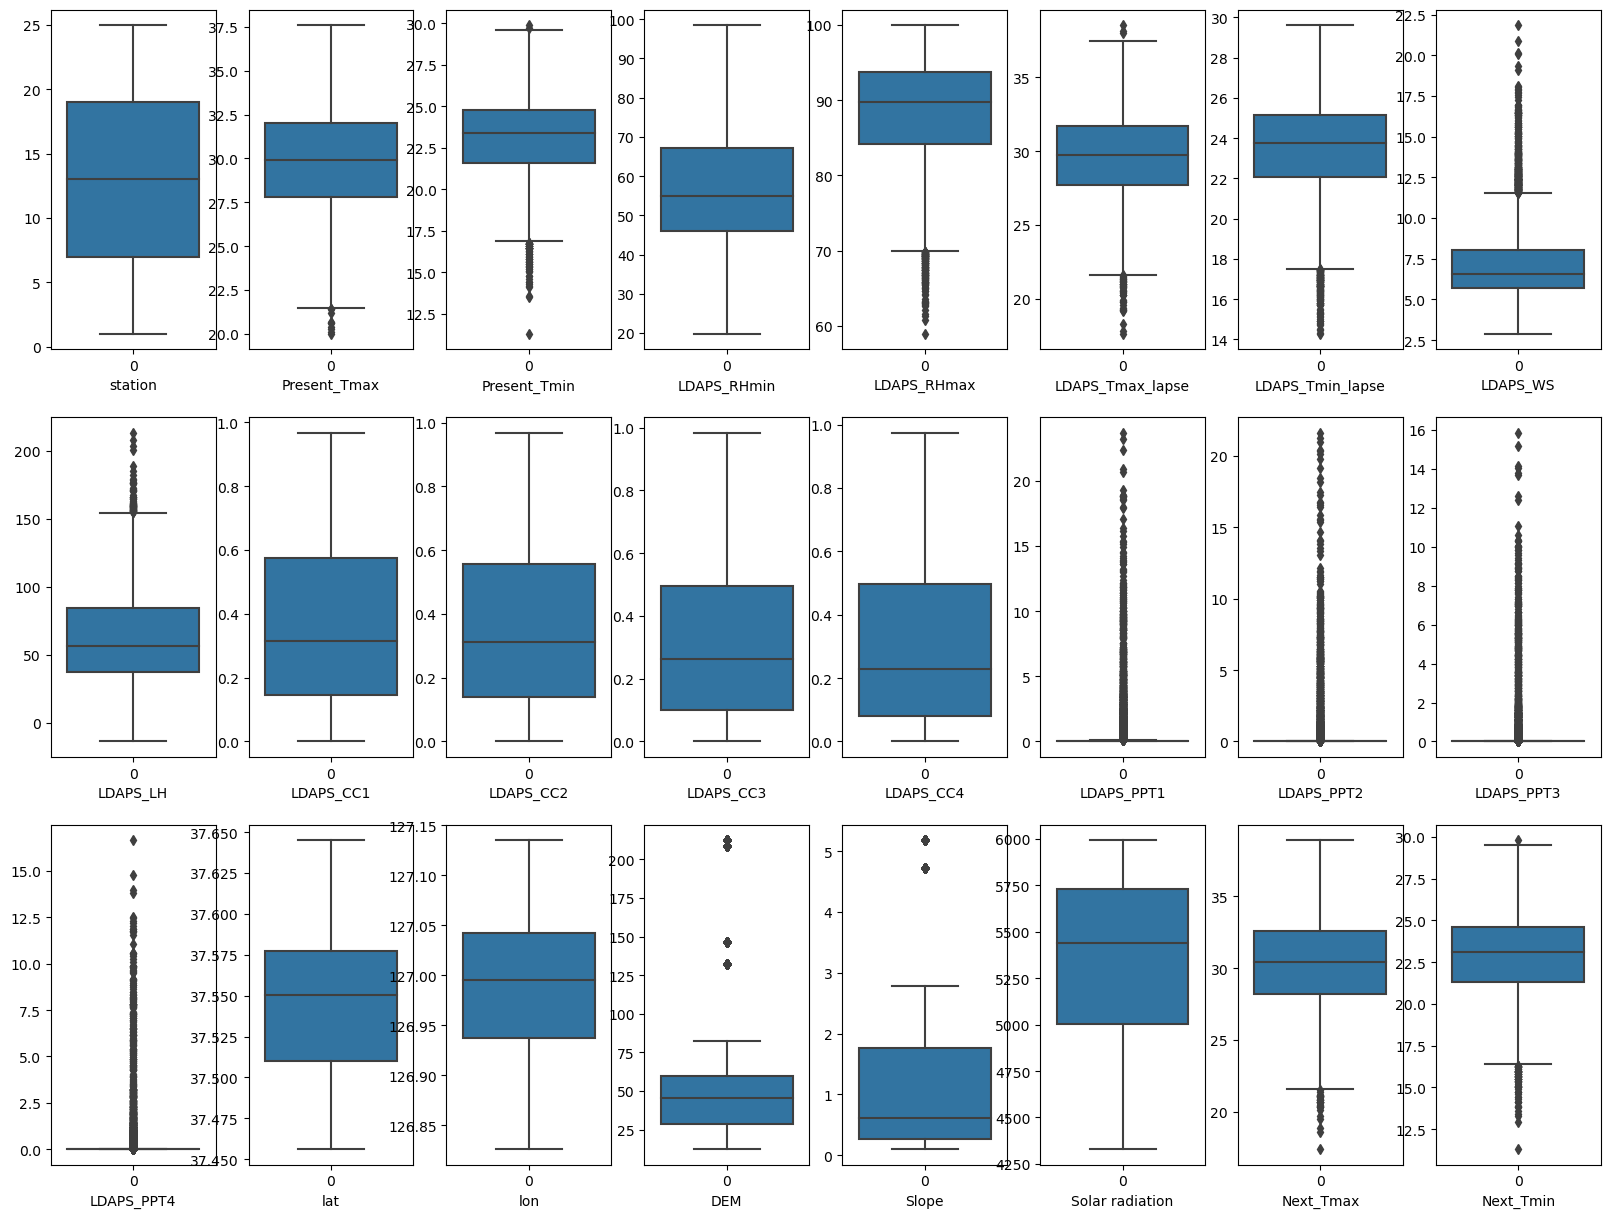

In [14]:
## outliers from graph

plt.figure(figsize=(20,15))
num = 1
for i in df.drop("Date",axis=1):
    if num <=24:
        ax = plt.subplot(3,8,num)
        sns.boxplot(df[i])
        plt.xlabel(i)
        num +=1
plt.show()

* **Removing Outliers**

In [15]:
from scipy.stats import zscore

In [16]:
z = np.abs(zscore(df.drop("Date",axis=1)))
z.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.664607,0.353318,0.748029,0.104660,0.382768,0.525269,0.215525,0.126423,0.206603,0.513123,...,0.275777,0.239969,0.224971,1.186076,0.005302,2.769091,1.111162,1.510565,0.366861,0.689265
1,1.526052,0.725138,0.664721,0.305052,0.311697,0.078334,0.223368,0.644133,0.313359,0.545304,...,0.275777,0.239969,0.224971,1.186076,0.512280,0.315828,0.543220,1.222997,0.083068,0.165513
2,1.387498,0.624033,0.043400,0.549344,0.609425,0.160080,0.449896,0.439100,1.244497,0.606944,...,0.275777,0.239969,0.224971,0.650626,0.840503,0.526719,0.723891,1.209602,0.275895,0.398527
3,1.248943,0.758840,0.085054,0.103573,1.128335,0.028710,0.079238,0.663353,0.096026,0.580143,...,0.275777,0.239969,0.224971,1.987268,0.386040,0.298272,0.928888,1.194265,0.468721,0.559681
4,1.110389,0.556630,0.539758,0.037665,0.249244,0.171981,0.010803,0.624327,1.349989,0.827872,...,0.275777,0.239969,0.224971,0.117159,1.812547,0.494848,0.549485,1.200286,0.308032,0.165513


In [17]:
np.where(z>3)

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64),
 array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))

In [18]:
print(z.iloc[25,7],z.iloc[25,14])

3.911059950709196 5.422387453409173


In [19]:
df = df[(z<3).all(axis=1)]
df.shape

(6739, 25)

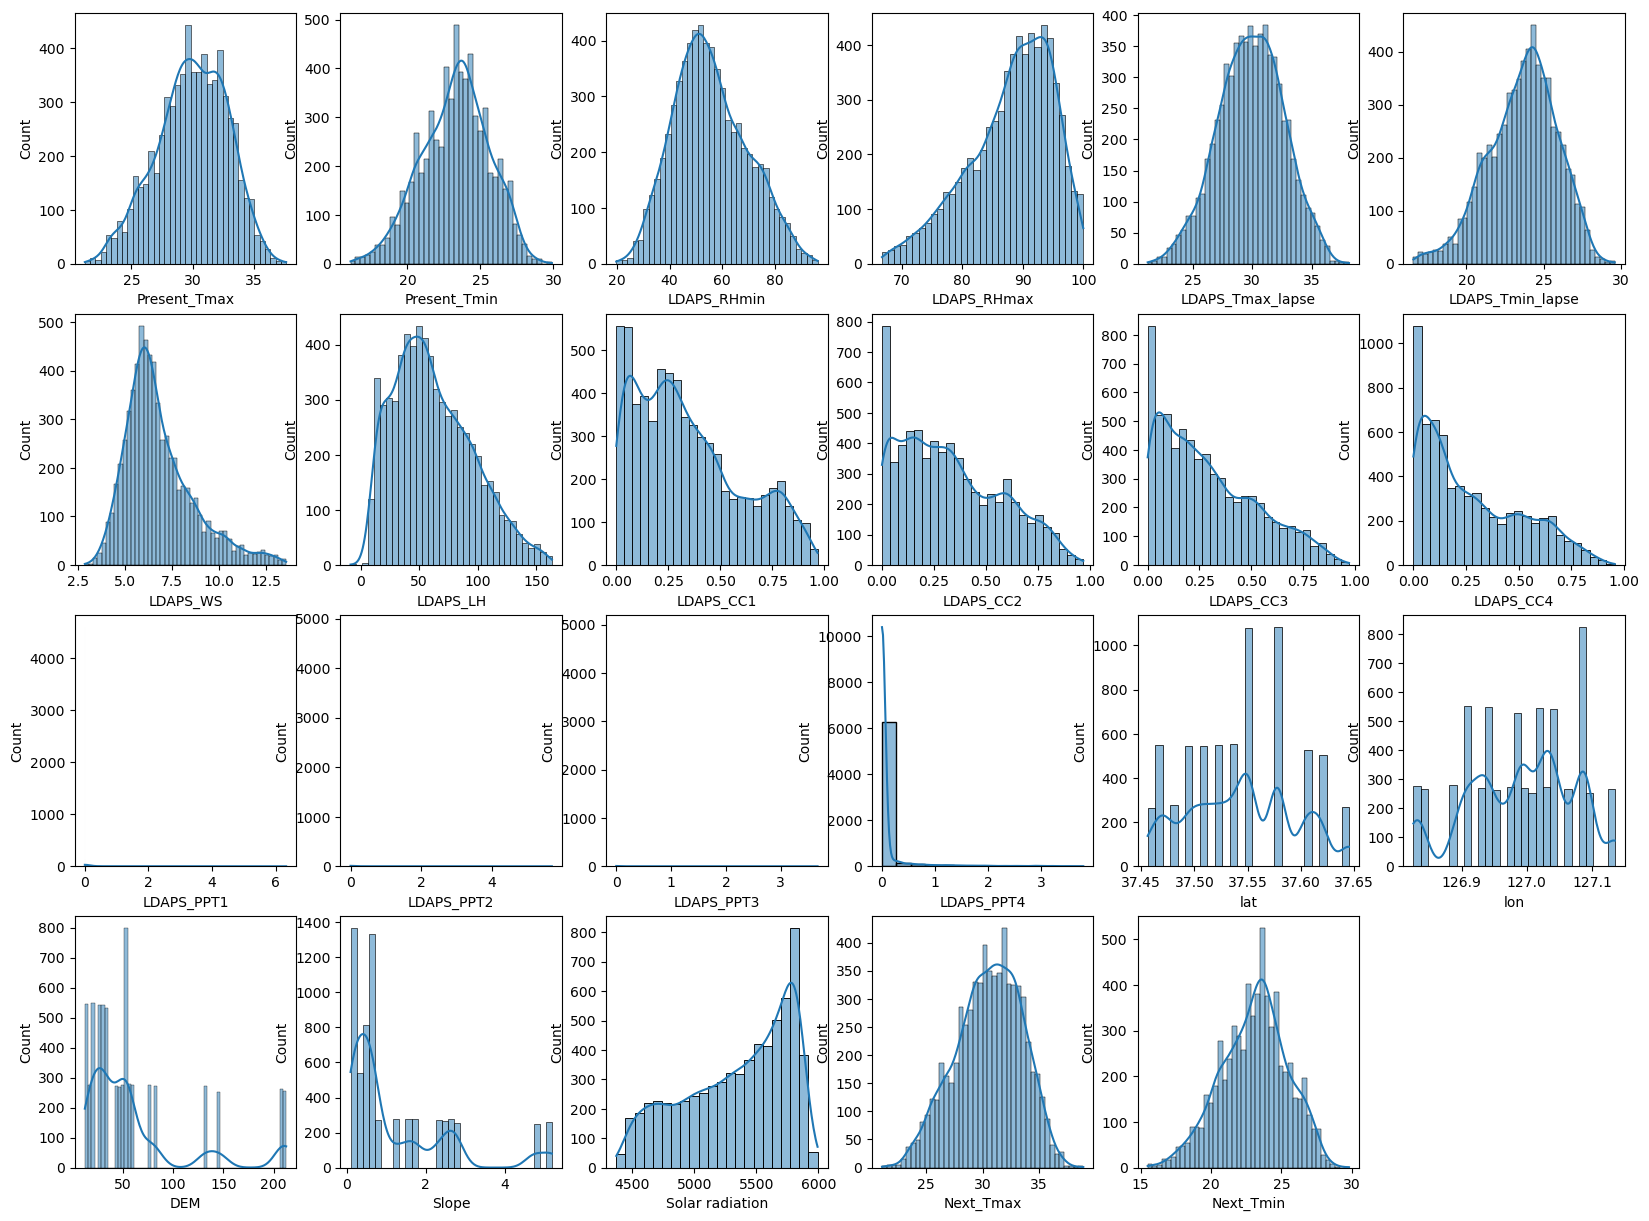

In [20]:
##Visiualizing  skweness from graph

plt.figure(figsize=(20,15))
num = 1
for i in df.drop(["Date","station"],axis=1):
    if num <=24:
        ax = plt.subplot(4,6,num)
        sns.histplot(df[i],kde=True)
        plt.xlabel(i)
        num +=1
plt.show()

In [21]:
df.loc[:,["LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]]

,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
7745,0.0,0.0,0.0,0.0
7746,0.0,0.0,0.0,0.0
7747,0.0,0.0,0.0,0.0
7748,0.0,0.0,0.0,0.0


* LDAPS_CC1,LDAPS_CC2 LDAPS_RHmax,DEM,Slope, LDAPS_CC3 ,LDAPS_CC4,and Solar radiation have some skwness
* "LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3" and "LDAPS_PPT3" have most of value is zero we have to drop it

In [22]:
df.drop(["LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"],axis=1,inplace=True)

#### Removing skweness

In [23]:
for i in ['LDAPS_CC1','LDAPS_CC2' , 'LDAPS_CC3' ,'LDAPS_CC4','Solar radiation','LDAPS_RHmax','DEM',"Slope"]:
    df[i] = np.sqrt(df[i])

#### Feature engineering

In [24]:
## cerating new feature 
df['Month'] = df['Date'].dt.strftime('%m')
df["Month"]=df["Month"].astype("int")

In [25]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'lat',
       'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin',
       'Month'],
      dtype='object')

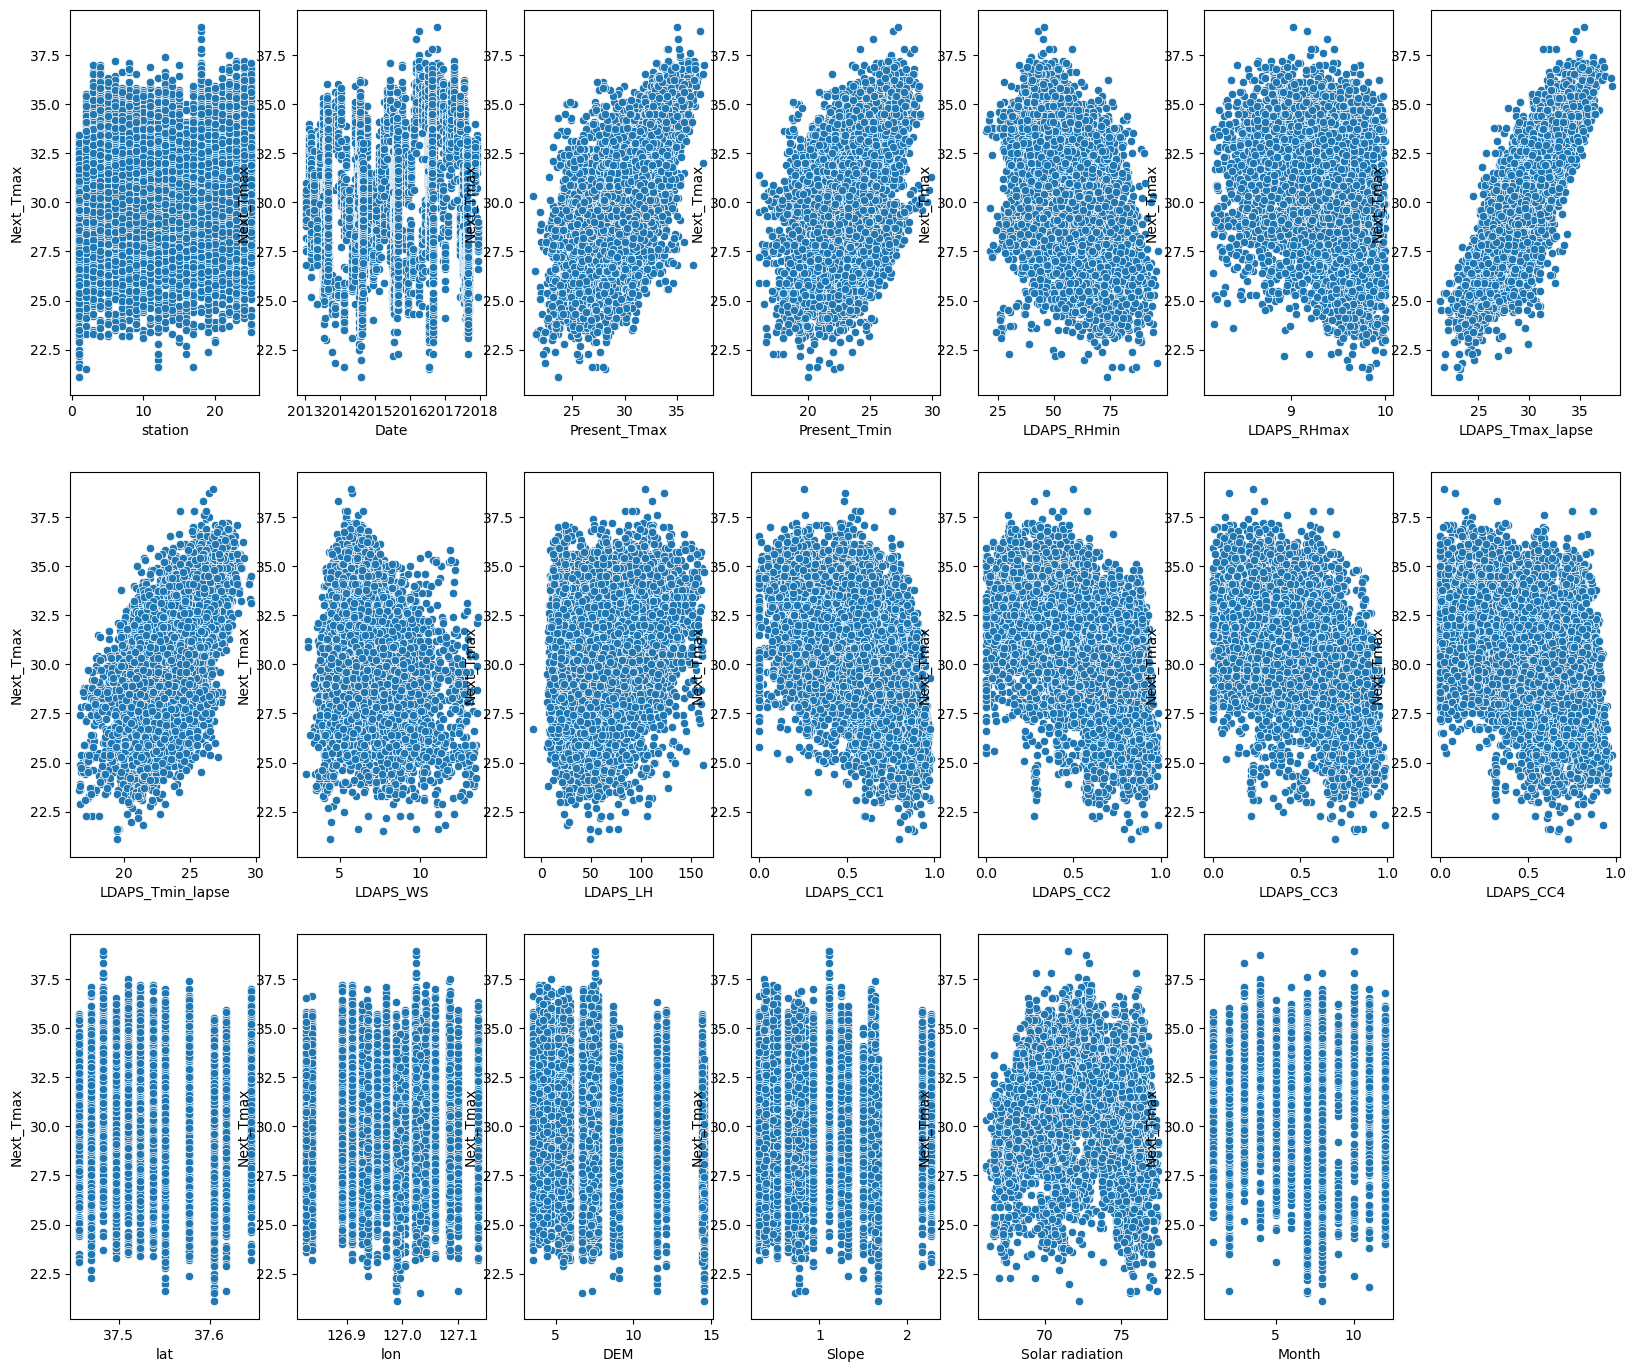

In [26]:
## scatterplot Plot to check correlation
plt.figure(figsize=(20,17))
num = 1
for i in df.drop(['Next_Tmax','Next_Tmin'],axis=1):
    if num <=21:
        ax = plt.subplot(3,7,num)
        sns.scatterplot(x=df[i],y=df['Next_Tmax'])
        plt.xlabel(i)
        num +=1
plt.show()

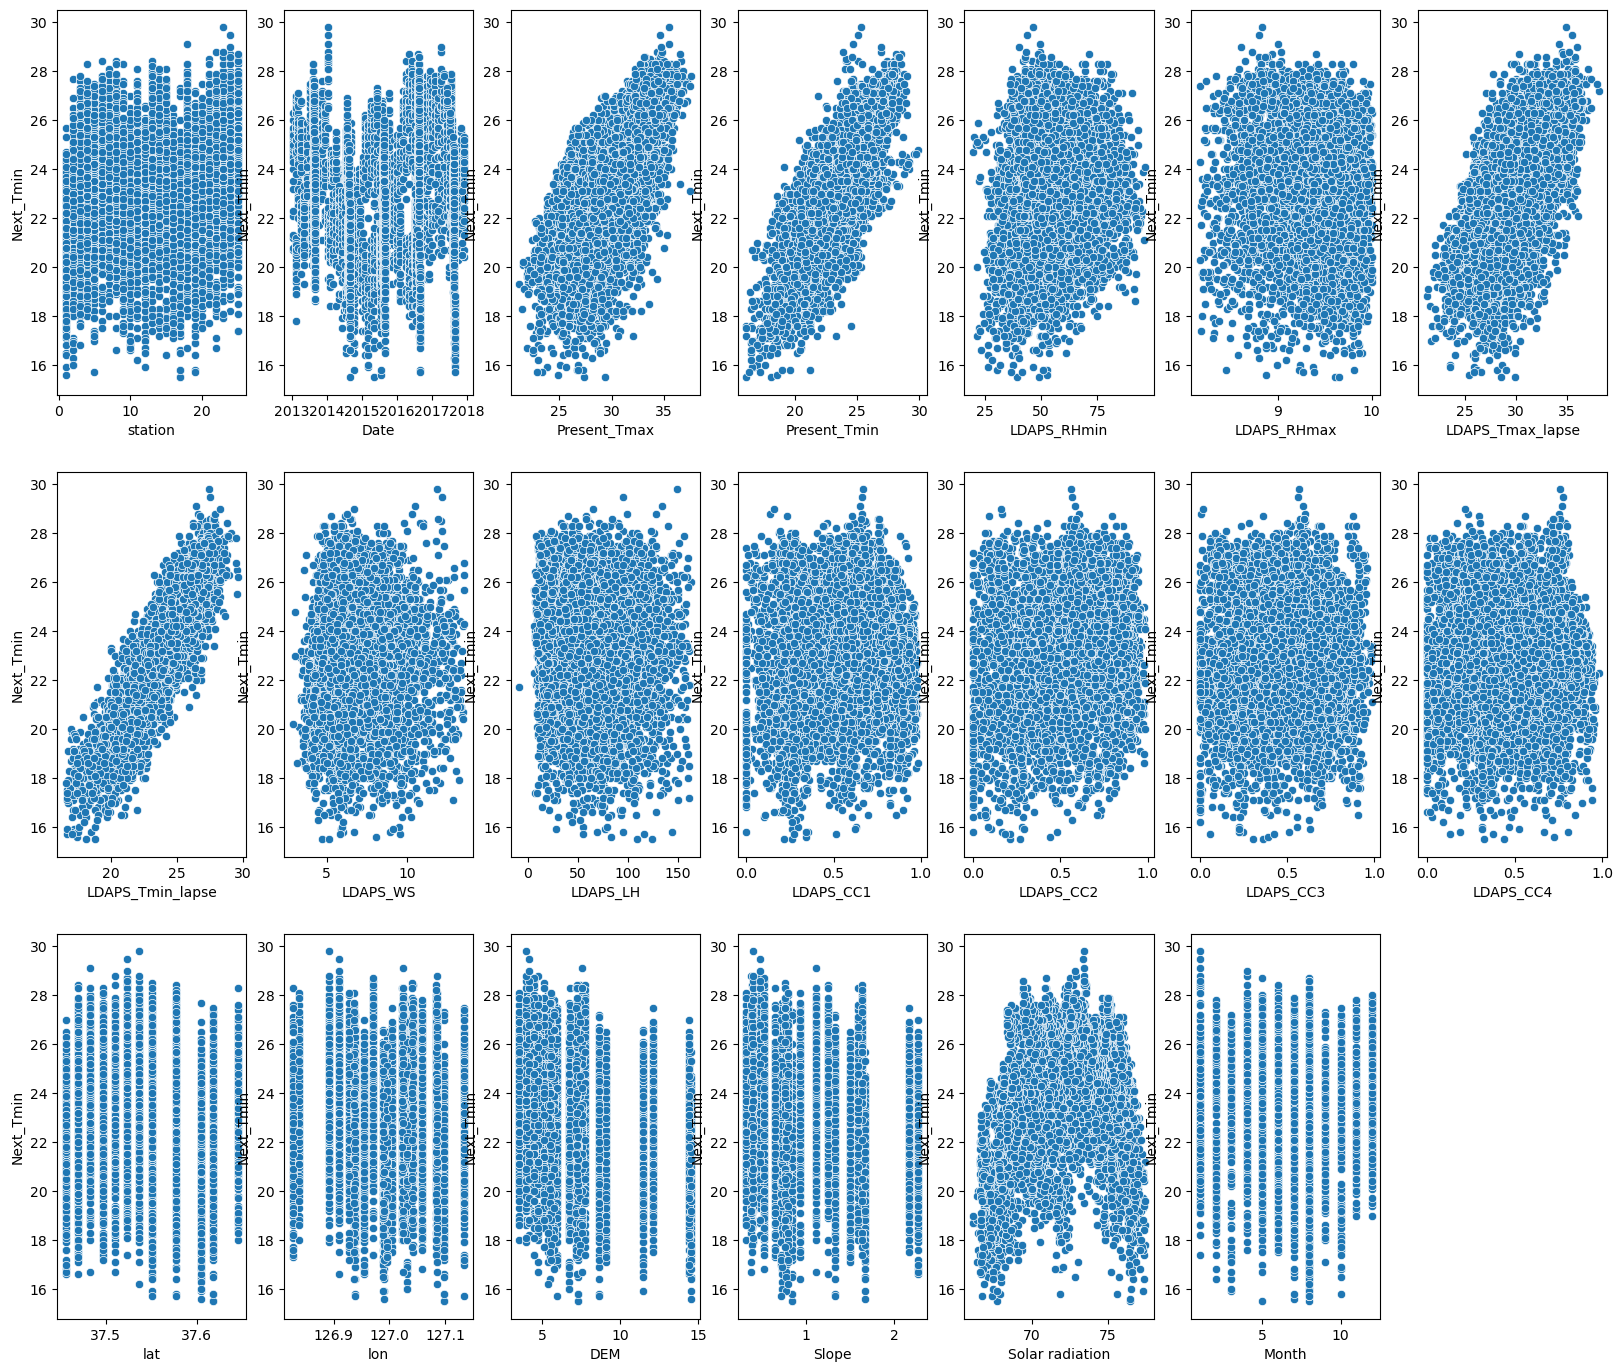

In [27]:
## scatterplot Plot to check correlation
plt.figure(figsize=(20,17))
num = 1
for i in df.drop(['Next_Tmax','Next_Tmin'],axis=1):
    if num <=21:
        ax = plt.subplot(3,7,num)
        sns.scatterplot(x=df[i],y=df['Next_Tmin'])
        plt.xlabel(i)
        num +=1
plt.show()

* Here Present_Tmax	,Present_Tmin ,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse are linearely correleted with 'Next_Tmax','Next_Tmin' 

<Axes: >

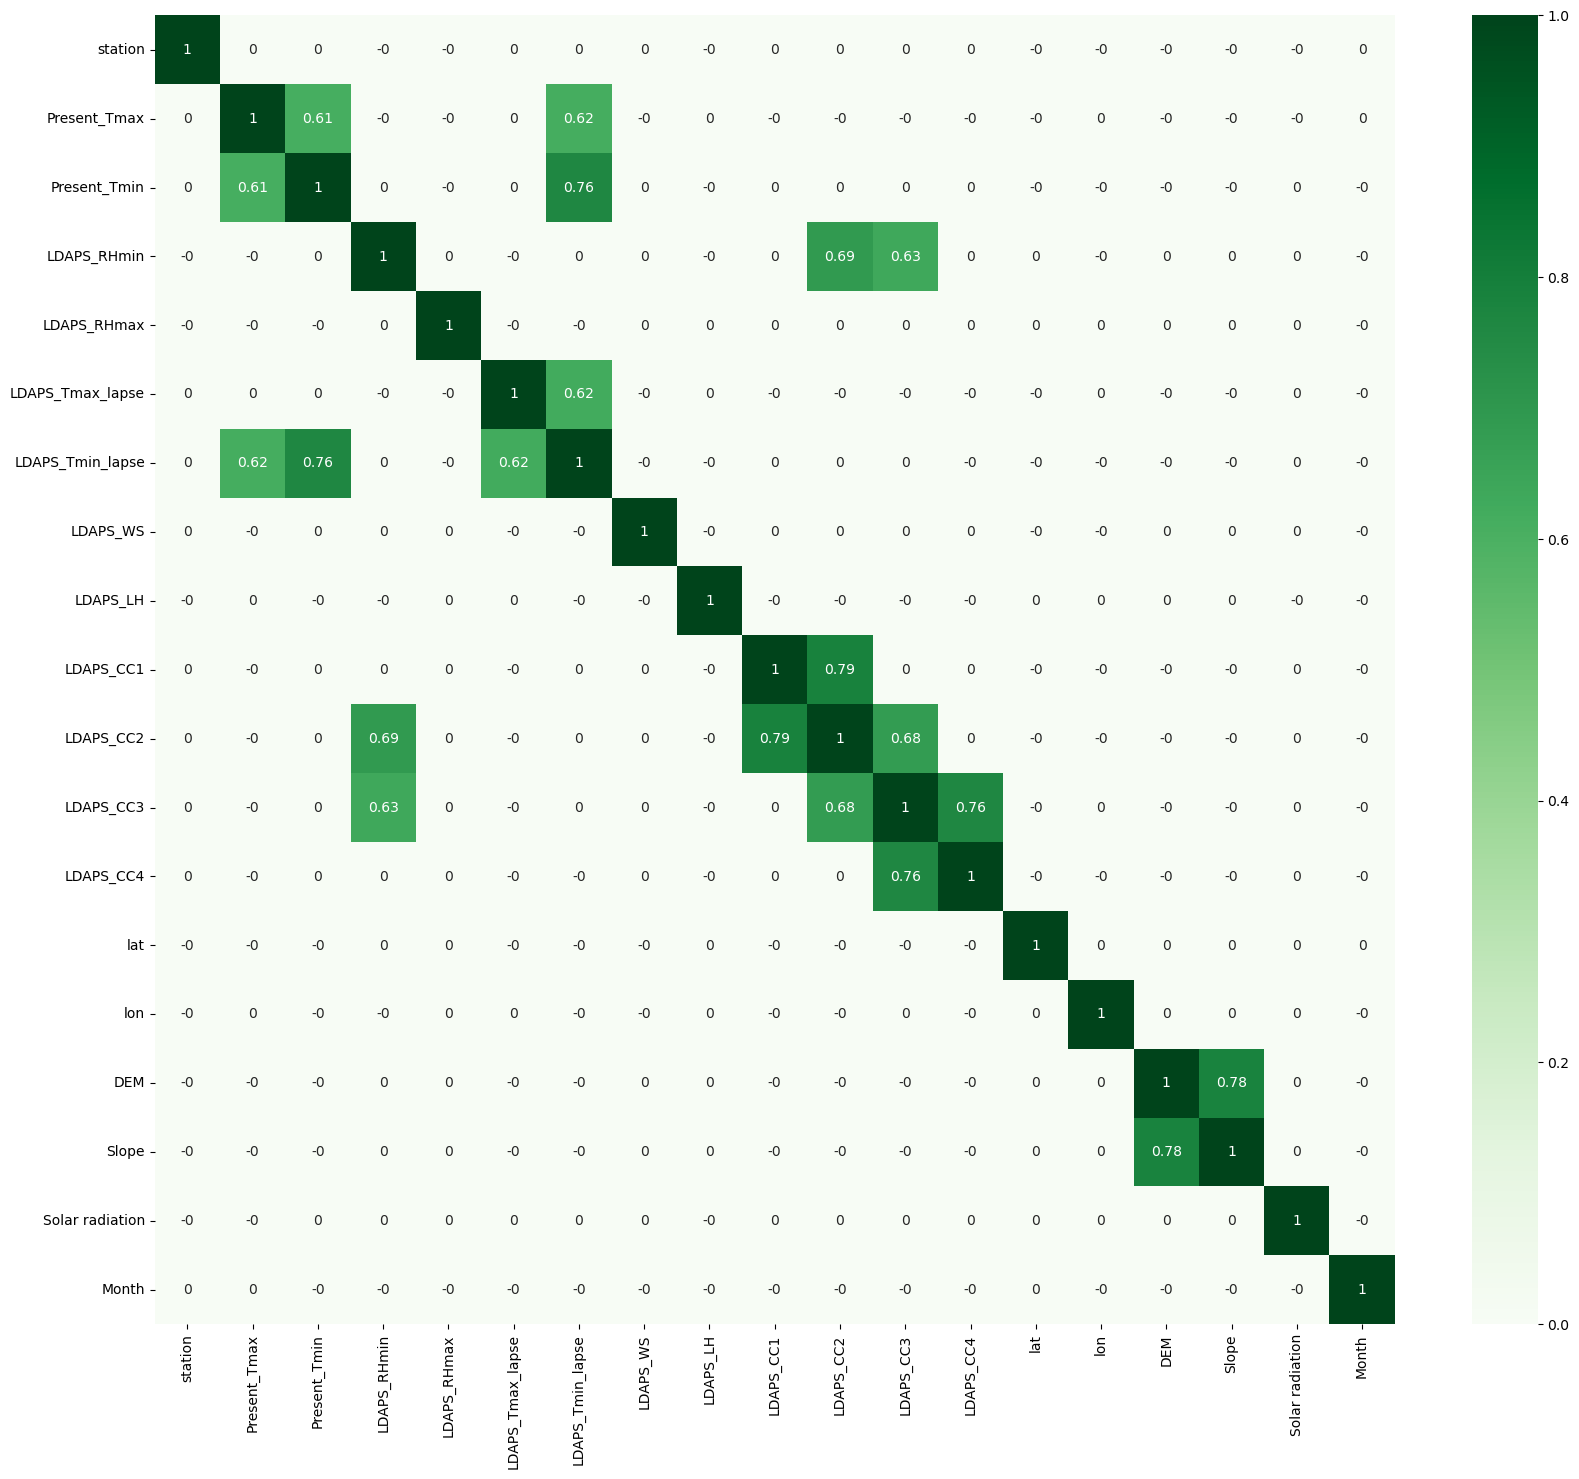

In [28]:
## heatmap to see correletion
df_corr = df.drop(['Next_Tmax','Next_Tmin'],axis=1).corr()
corr = np.abs(df_corr>0.6) * df_corr
plt.figure(figsize=(20,17))
sns.heatmap(corr,annot=True,cmap="Greens")

* DEM and slope have strong correletion
* LDAPS_RHmin have correletion with LDAPS_CC2 and LDAPS_CC3 
* LDAPS_Tmin_lapse have correletion with LDAPS_Tmax_lapse,Present_Tmin and Present_Tmax
* LDAPS_CC1, LDAPS_CC2 have strong correletion
* LDAPS_CC2, LDAPS_CC3 have strong correletion
* LDAPS_CC3, LDAPS_CC4 have strong correletion

In [29]:
x = df.drop(['Next_Tmax','Next_Tmin',"Date"],axis=1)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Month
0,1.0,28.7,21.4,58.255688,9.545489,28.074101,23.006936,6.818887,69.451805,0.483681,0.451548,0.402115,0.361840,37.6046,126.991,14.571719,1.668832,77.413797,6
1,2.0,31.9,21.6,52.263397,9.518651,29.850689,24.035009,5.691890,51.937448,0.474877,0.501768,0.399304,0.357390,37.6046,127.032,6.690471,0.717008,76.611438,6
2,3.0,31.6,23.3,48.690479,9.163710,30.091292,24.565633,6.138224,20.573050,0.457541,0.507414,0.451765,0.376995,37.5776,127.058,5.771204,0.515849,76.573858,6
3,4.0,32.0,23.4,58.239788,9.822611,29.704629,23.326177,5.650050,65.727144,0.465158,0.475397,0.401444,0.366400,37.6450,127.022,6.761361,1.592106,76.530810,6
4,5.0,31.4,21.9,56.174095,9.495005,29.113934,23.486480,5.735004,107.965535,0.389110,0.499995,0.422957,0.412336,37.5507,127.135,5.919290,0.710985,76.547712,6


In [30]:
y = df.loc[:,'Next_Tmax']
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

* Removing multicoliniarity by vif

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif["ver"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

* from above correletion and vif we remove multicoliniarity

In [32]:
vif(x)

,ver,VIF
0,station,5.183817
1,Present_Tmax,288.939225
2,Present_Tmin,309.245738
3,LDAPS_RHmin,96.951186
4,LDAPS_RHmax,1361.085157
5,LDAPS_Tmax_lapse,774.439868
6,LDAPS_Tmin_lapse,772.443145
7,LDAPS_WS,17.262911
8,LDAPS_LH,6.605532
9,LDAPS_CC1,20.010348


In [33]:
x.drop(["lon","LDAPS_RHmax","Present_Tmax","LDAPS_CC3","LDAPS_CC2","DEM","LDAPS_RHmin","LDAPS_Tmin_lapse"],axis=1,inplace=True)
vif(x)

,ver,VIF
0,station,4.494002
1,Present_Tmin,152.110899
2,LDAPS_Tmax_lapse,230.350366
3,LDAPS_WS,16.634802
4,LDAPS_LH,4.773992
5,LDAPS_CC1,9.605135
6,LDAPS_CC4,5.894031
7,lat,924.496449
8,Slope,4.468417
9,Solar radiation,753.050469


**Feature selection**

In [34]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 

In [35]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [36]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True])

In [37]:
selected_feat = x.columns[(model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 11
feature selected: 10


In [38]:
print(selected_feat)
x = x[selected_feat]
x.head()

Index(['station', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC4', 'Slope', 'Solar radiation', 'Month'],
      dtype='object')


,station,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC4,Slope,Solar radiation,Month
0,1.0,21.4,28.074101,6.818887,69.451805,0.483681,0.361840,1.668832,77.413797,6
1,2.0,21.6,29.850689,5.691890,51.937448,0.474877,0.357390,0.717008,76.611438,6
2,3.0,23.3,30.091292,6.138224,20.573050,0.457541,0.376995,0.515849,76.573858,6
3,4.0,23.4,29.704629,5.650050,65.727144,0.465158,0.366400,1.592106,76.530810,6
4,5.0,21.9,29.113934,5.735004,107.965535,0.389110,0.412336,0.710985,76.547712,6


### feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler
smt = StandardScaler()

x_new = smt.fit_transform(x)
x = pd.DataFrame(x_new,columns=x.columns)
x.head(3)

,station,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC4,Slope,Solar radiation,Month
0,-1.672719,-0.814460,-0.662498,-0.020735,0.225115,-0.230850,-0.420756,1.282070,1.500821,-0.479519
1,-1.533959,-0.727785,-0.016693,-0.631488,-0.298746,-0.268304,-0.438998,-0.467453,1.225513,-0.479519
2,-1.395198,0.008945,0.070769,-0.389607,-1.236867,-0.342055,-0.358635,-0.837198,1.212618,-0.479519


spliting data

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (5391, 10)
x_test : (1348, 10)
y_train : (5391,)
y_test : (1348,)


# Model Bulding max Temperature

In [41]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[ 0.19511849  0.52554248  1.80799594 -0.29017768  0.3380707  -0.36967977
 -0.3197916   0.0741809   0.0569451  -0.08899844]
30.531160643458108


In [43]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [44]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.7349679143968051
mean_absolute_error: 1.1443072308506177
mean_squared_error: 2.263184214726985
<-----------------test data----------------->
r2_score: 0.7294193950821859
mean_absolute_error: 1.1793753933202977
mean_squared_error: 2.3234635321589514


### Ridge

In [45]:
rg = Ridge()
rg.fit(x_train,y_train)
print(rg.coef_)
print(rg.intercept_)

[ 0.1950802   0.52567107  1.80751327 -0.2901951   0.33798837 -0.3698029
 -0.31988308  0.07412285  0.05698402 -0.08898954]
30.531159076589375


In [46]:
y_train_pred = rg.predict(x_train)
y_test_pred = rg.predict(x_test)

In [47]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.7349678978190933
mean_absolute_error: 1.1443167578334996
mean_squared_error: 2.2631843562887703
<-----------------test data----------------->
r2_score: 0.7294146983101333
mean_absolute_error: 1.1793939775144564
mean_squared_error: 2.3235038631301475


### RandomForestRegressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [50]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [51]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.9810726729584937
mean_absolute_error: 0.2975807827861251
mean_squared_error: 0.16162581858653272
<-----------------test data----------------->
r2_score: 0.8640496179725206
mean_absolute_error: 0.8109169139465868
mean_squared_error: 1.16739983976261


### AdaBoostRegressor

In [52]:
from sklearn.ensemble import AdaBoostRegressor

In [53]:
Ada = AdaBoostRegressor()
Ada.fit(x_train,y_train)

AdaBoostRegressor()

In [54]:
y_train_pred = Ada.predict(x_train)
y_test_pred = Ada.predict(x_test)

In [55]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.7219364976551189
mean_absolute_error: 1.2483997714751682
mean_squared_error: 2.3744631815667545
<-----------------test data----------------->
r2_score: 0.7173852825157374
mean_absolute_error: 1.25840701256206
mean_squared_error: 2.4267999176272728


### GradientBoostingRegressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
gbr = GradientBoostingRegressor(alpha=0.1)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.1)

In [58]:
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

In [59]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.8401892735641125
mean_absolute_error: 0.8808590527118205
mean_squared_error: 1.364669159172148
<-----------------test data----------------->
r2_score: 0.8123410278357872
mean_absolute_error: 0.9701295909439576
mean_squared_error: 1.611419186672363


### knn

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [62]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [63]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.8746261458703846
mean_absolute_error: 0.771192728621777
mean_squared_error: 1.0706029308106104
<-----------------test data----------------->
r2_score: 0.8100936281115885
mean_absolute_error: 0.9670919881305637
mean_squared_error: 1.6307175074183975


#### XGBOOST

In [64]:
from xgboost import XGBRegressor

In [65]:
xgr = XGBRegressor()
xgr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_train_pred = xgr.predict(x_train)
y_test_pred = xgr.predict(x_test)

In [67]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.9840839043189302
mean_absolute_error: 0.2669224234021809
mean_squared_error: 0.1359120591889843
<-----------------test data----------------->
r2_score: 0.8988218998964033
mean_absolute_error: 0.714813173277088
mean_squared_error: 0.8688118127137705


Here from all model xgboost have high validation accuracy and least loss between other model

### Final Model max Temperature

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param = {
    'n_estimators' : [100,500,800,1000],
    'max_depth' : [8,10,12],
    'booster':['gbtree','gblinear'],
    'learning_rate':[0.001,0.01,0.1,1,10,100]
}

In [70]:
xgr_cv = GridSearchCV(estimator=xgr,param_grid=param,scoring="r2",cv=5,verbose=1)
xgr_cv.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_depth': [8, 10, 12],
                         'n_estimators': [100, 500, 800, 1000]},
             scoring='r2', verbose=1)

In [71]:
xgr_cv.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 1000}

In [72]:
y_train_pred = xgr_cv.predict(x_train)
y_test_pred = xgr_cv.predict(x_test)

In [73]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.9999989002145674
mean_absolute_error: 0.0019567809815177932
mean_squared_error: 9.391380010172547e-06
<-----------------test data----------------->
r2_score: 0.893513910469757
mean_absolute_error: 0.7099692788958903
mean_squared_error: 0.9143912801173708


### saving model

In [74]:
import joblib

In [75]:
joblib.dump(xgr_cv,"Temperature_max.obj")

['Temperature_max.obj']

In [76]:
Temperature_max = joblib.load("Temperature_max.obj") # load model

**prdiction**

In [77]:
x.columns

Index(['station', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC4', 'Slope', 'Solar radiation', 'Month'],
      dtype='object')

In [78]:
input_val=df.loc[:,x.columns].sample(3)
input_val

,station,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC4,Slope,Solar radiation,Month
677,3.0,23.3,29.077256,7.013412,46.788020,0.969728,0.926601,0.515849,74.242628,7
4504,5.0,19.5,23.484875,6.608491,85.307993,0.573841,0.611537,0.710985,68.118244,8
3914,15.0,25.8,29.593361,10.051132,51.930020,0.719253,0.551529,0.924770,73.520193,1


In [79]:
np.round(Temperature_max.predict(input_val),1)

array([34. , 34. , 33.6], dtype=float32)

### second model

In [80]:
y= df.loc[:,'Next_Tmin']
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (5391, 10)
x_test : (1348, 10)
y_train : (5391,)
y_test : (1348,)


# Model Bulding for min Temperature

In [82]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### LinearRegression

In [83]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[ 0.04566417  1.48435116  0.77169649  0.03156266 -0.07415349  0.17838939
  0.13210912 -0.00318532  0.10107958  0.02569566]
23.060086848474775


In [84]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [85]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.6888542708573926
mean_absolute_error: 1.0387761582490294
mean_squared_error: 1.7287746692912176
<-----------------test data----------------->
r2_score: 0.6777715697618509
mean_absolute_error: 1.0600248631343863
mean_squared_error: 1.7924933861403738


### Ridge

In [86]:
rg = Ridge()
rg.fit(x_train,y_train)
print(rg.coef_)
print(rg.intercept_)

[ 0.04569234  1.48409066  0.7716432   0.03156154 -0.07413765  0.17837688
  0.13207187 -0.00322829  0.10107706  0.02568048]
23.060087370752807


In [87]:
y_train_pred = rg.predict(x_train)
y_test_pred = rg.predict(x_test)

In [88]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.6888542563248408
mean_absolute_error: 1.0387854577439297
mean_squared_error: 1.728774750036364
<-----------------test data----------------->
r2_score: 0.6777725382234715
mean_absolute_error: 1.0600354985665086
mean_squared_error: 1.792487998778842


### RandomForestRegressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [91]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [92]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.9789036051045682
mean_absolute_error: 0.25518085698386245
mean_squared_error: 0.1172148922277873
<-----------------test data----------------->
r2_score: 0.8510461368237993
mean_absolute_error: 0.6916980712166176
mean_squared_error: 0.8286010467359057


### AdaBoostRegressor

In [93]:
from sklearn.ensemble import AdaBoostRegressor

In [94]:
Ada = AdaBoostRegressor()
Ada.fit(x_train,y_train)

AdaBoostRegressor()

In [95]:
y_train_pred = Ada.predict(x_train)
y_test_pred = Ada.predict(x_test)

In [96]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.6936195835188879
mean_absolute_error: 1.0677558110970222
mean_squared_error: 1.7022978417186618
<-----------------test data----------------->
r2_score: 0.6669569825321476
mean_absolute_error: 1.112561977090521
mean_squared_error: 1.8526528080410252


### GradientBoostingRegressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
gbr = GradientBoostingRegressor(alpha=0.1)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.1)

In [99]:
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

In [100]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.8181999075896189
mean_absolute_error: 0.792362503786635
mean_squared_error: 1.0101099426944733
<-----------------test data----------------->
r2_score: 0.7853307885354696
mean_absolute_error: 0.8661568381745013
mean_squared_error: 1.1941626053100014


### knn

In [101]:
from sklearn.neighbors import KNeighborsRegressor

In [102]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [103]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [104]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.8517520219775085
mean_absolute_error: 0.6919309961046188
mean_squared_error: 0.8236891114820999
<-----------------test data----------------->
r2_score: 0.7737360741654042
mean_absolute_error: 0.869287833827893
mean_squared_error: 1.2586617210682491


#### XGBOOST

In [105]:
from xgboost import XGBRegressor

In [106]:
xgr = XGBRegressor()
xgr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
y_train_pred = xgr.predict(x_train)
y_test_pred = xgr.predict(x_test)

In [108]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.985259353852325
mean_absolute_error: 0.213000784201561
mean_squared_error: 0.08190135130347885
<-----------------test data----------------->
r2_score: 0.8764464391636192
mean_absolute_error: 0.6285811260121513
mean_squared_error: 0.6873041601873059


Here from all model xgboost have high validation accuracy and least loss between other model

### Final model for min Temperature

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
param = {
    'n_estimators' : [100,300,500,800],
    'max_depth' : [8,10,12],
    'booster':['gbtree','gblinear'],
    'learning_rate':[0.001,0.01,0.01,1]
}

In [111]:
xgr_cv = GridSearchCV(estimator=xgr,param_grid=param,scoring="neg_mean_squared_error",cv=5,verbose=1)
xgr_cv.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.001, 0.01, 0.01, 1],
                         'max_depth': [8, 10, 12],
                         'n_estimators': [100, 300, 500, 800]},
             scoring='neg_mean_squared_error', verbose=1)

In [112]:
xgr_cv.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 800}

In [113]:
y_train_pred = xgr_cv.predict(x_train)
y_test_pred = xgr_cv.predict(x_test)

In [114]:
print("<-----------------train data----------------->")
print("r2_score:",r2_score(y_train,y_train_pred))
print("mean_absolute_error:",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error:",mean_squared_error(y_train,y_train_pred))

print("<-----------------test data----------------->")
print("r2_score:",r2_score(y_test,y_test_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))

<-----------------train data----------------->
r2_score: 0.9781988667356168
mean_absolute_error: 0.25576455567900713
mean_squared_error: 0.121130529585491
<-----------------test data----------------->
r2_score: 0.8715898633717633
mean_absolute_error: 0.645304665721135
mean_squared_error: 0.7143203361956034


### saving model

In [115]:
import joblib

In [116]:
joblib.dump(xgr_cv,"Temperature_min.obj")

['Temperature_min.obj']

In [117]:
Temperature_min = joblib.load("Temperature_min.obj") # load model

**prdiction**

In [118]:
np.round(Temperature_min.predict(input_val),1)

array([24.7, 24.6, 24.8], dtype=float32)